# The Convolutional Classifier

Create your first computer vision model with Keras.

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"robitalhazmi","key":"24e217cd189970941ea296af7be6d97a"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                              title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                        1MB  2024-04-10 09:48:38          10534        219  1.0              
sahirmaharajj/unemployment-by-age-groups-dataset                 Unemployment by Age Groups Dataset                 3KB  2024-04-20 21:31:03           1387         35  1.0              
aaronfriasr/amazon-products-dataset                              Amazon Products Dataset (+1M Products)            99MB  2024-04-25 12:37:57            949         27  0.7647059        
jacopoferretti/child-vs-mother-iq                                Child

In [8]:
!kaggle datasets download -d ryanholbrook/car-or-truck

Dataset URL: https://www.kaggle.com/datasets/ryanholbrook/car-or-truck
License(s): copyright-authors
 94% 73.0M/77.7M [00:01<00:00, 76.5MB/s]
100% 77.7M/77.7M [00:01<00:00, 70.5MB/s]


In [9]:
! kaggle datasets download -d ryanholbrook/cv-course-models

Dataset URL: https://www.kaggle.com/datasets/ryanholbrook/cv-course-models
License(s): unknown
 98% 473M/481M [00:09<00:00, 52.7MB/s]
100% 481M/481M [00:09<00:00, 52.8MB/s]


In [10]:
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("car-or-truck.zip", 'r') as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall(path="./car-or-truck")

In [11]:
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("cv-course-models.zip", 'r') as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall(path="./cv-course-models")

## Example - Train a Convnet Classifier

### Step 1 - Load Data

In [12]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    './car-or-truck/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    './car-or-truck/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


### Step 2 - Define Pretrained Base

In [13]:
pretrained_base = tf.keras.models.load_model(
    './cv-course-models/cv-course-models/vgg16-pretrained-base',
)
pretrained_base.trainable = False

### Step 3 - Attach Head

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

### Step 4 - Train

In [15]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
    verbose=0,
)

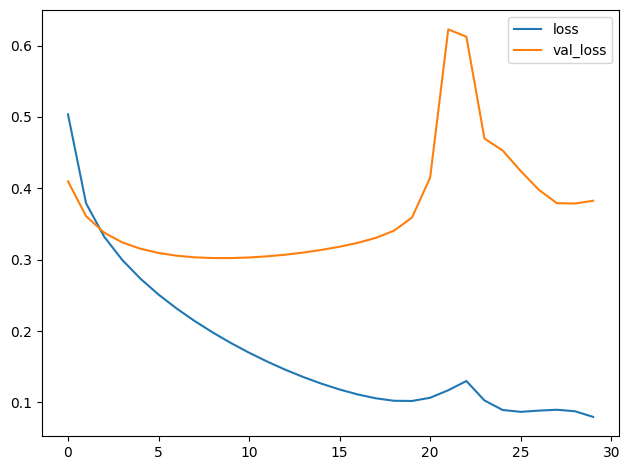

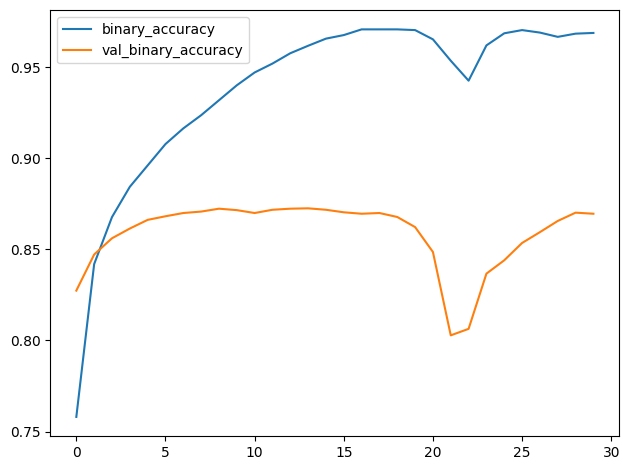

In [16]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();